Project_Xu_Oltean_Asia_and_Europe

Part_1_Oltean

In [1]:
# Modules & Connection 

import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")

import mysql.connector
host = "localhost"
username = "root"
password = ""
conn = mysql.connector.connect(host=host, user=username, passwd=password)
cursor = conn.cursor(buffered=True)

cursor.execute("USE mondial")


Continent  Countries  Provinces  Cities
     Asia         53        403    1055
   Europe         53        491     838


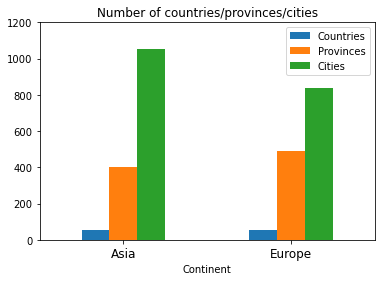

Continent Country  Provinces  Cities
   Europe       A          9       9
     Asia     AFG          1       1
   Europe      AL          1       6
   Europe     AND          1       1
     Asia     ARM          1       1
     Asia      AZ          1       1
   Europe       B          9      10
     Asia      BD          1      25
   Europe      BG          1       1
     Asia     BHT          1       1
   Europe     BIH          1       1
     Asia     BRN          1       1
     Asia     BRU          1       1
   Europe      BY          1       1
   Europe      CH         26      28
     Asia      CL          1       1
   Europe      CY          1       1
   Europe      CZ          7      11
   Europe       D         16      84
   Europe      DK          1       6
   Europe       E         17      58
     Asia      ET          3       3
   Europe      EW          1       1
   Europe       F         22      39
   Europe    FARX          1       1
   Europe      FL          1       1
 

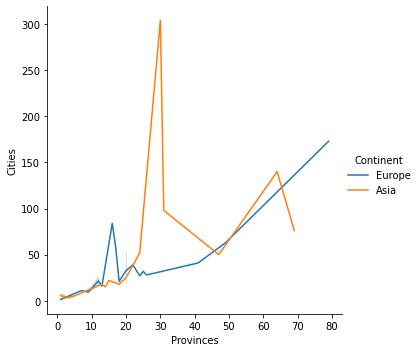

In [2]:
# Q1: Countries/provinces/cities in each continent (COUNT, SUM, CAST, DISTINCT, UNION, nested query) 

sql1 = """SELECT total.Continent, 
                    COUNT(total.Country) AS Countries, 
                    CAST(SUM(total.Provinces) AS INT) AS Provinces, 
                    CAST(SUM(total.Cities) AS INT) AS Cities
            FROM
                (
                SELECT enc.Continent, city.Country, 
                    CAST(ROUND(COUNT(DISTINCT city.Province)*enc.Percentage/100, 0) AS INT) AS Provinces, 
                    CAST(ROUND(COUNT(DISTINCT city.Name)*enc.Percentage/100, 0) AS INT) AS Cities
                FROM city
                JOIN encompasses enc
                ON city.Country = enc.Country
                WHERE enc.Continent = 'Asia'
                GROUP BY city.Country
            
                UNION
                SELECT enc.Continent, city.Country, 
                    CAST(ROUND(COUNT(DISTINCT city.Province)*enc.Percentage/100, 0) AS INT) AS Provinces, 
                    CAST(ROUND(COUNT(DISTINCT city.Name)*enc.Percentage/100, 0) AS INT) AS Cities
                FROM city
                JOIN encompasses enc
                ON city.Country = enc.Country
                WHERE enc.Continent = 'Europe'
                GROUP BY city.Country
                ) total
            GROUP BY total.Continent
            """

df1 = pd.read_sql(sql1, conn)
print(df1.to_string(index=False))
df1 = df1.set_index('Continent')
df1.to_excel('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q1_1.xlsx')

ax1 = df1.plot(
    y = ['Countries', 'Provinces', 'Cities'], 
    kind='bar', 
    title='Number of countries/provinces/cities' 
    )
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=12)
ax1.set_ylim([0, 1200])
plt.show()

ax1.figure.savefig('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q1_1.jpg')


sql2 = """SELECT enc.Continent, city.Country, 
                    CAST(ROUND(COUNT(DISTINCT city.Province)*enc.Percentage/100, 0) AS INT) AS Provinces, 
                    CAST(ROUND(COUNT(DISTINCT city.Name)*enc.Percentage/100, 0) AS INT) AS Cities
                FROM city
                JOIN encompasses enc
                ON city.Country = enc.Country
                WHERE enc.Continent = 'Asia' OR enc.Continent = 'Europe'
                GROUP BY city.Country
        """
df2 = pd.read_sql(sql2, conn)
print(df2.to_string(index=False))

ax2=sns.relplot(x='Provinces', y='Cities', hue='Continent', kind='line', data=df2)
plt.show()

ax2.figure.savefig('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q1_2.jpg')
df2 = df2.set_index('Continent')
df2.head().to_excel('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q1_2.xlsx')


Asia:

             Country         Area   Population
         Afghanistan 6.475000e+05   22664136.0
             Armenia 2.980000e+04    3463574.0
          Azerbaijan 8.660000e+04    7676953.0
          Bangladesh 1.440000e+05  123062800.0
              Bhutan 4.700000e+04    1822625.0
             Bahrain 6.200000e+02     590042.0
              Brunei 5.770000e+03     299939.0
           Sri Lanka 6.561000e+04   18553074.0
               Egypt 1.001450e+05    6357510.7
          Gaza Strip 3.600000e+02     813332.0
             Georgia 6.970000e+04    5219810.0
           Hong Kong 1.092000e+03    7055071.0
              Israel 2.077000e+04    5421995.0
               India 3.287590e+06  952107694.0
                Iran 1.648000e+06   66094264.0
                Iraq 4.370720e+05   21422292.0
               Japan 3.778350e+05  125449703.0
              Jordan 8.921300e+04    4212152.0
            Cambodia 1.810400e+05   10861218.0
           Kazakstan 2.717300e+06   16916463.0
      

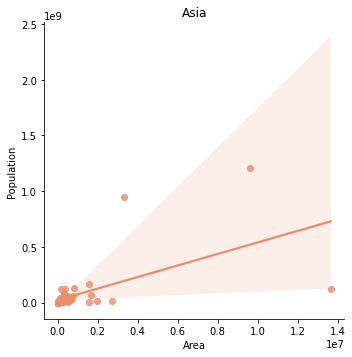


Europe:

               Country       Area  Population
               Austria   83850.00   8023244.0
               Albania   28750.00   3249136.0
               Andorra     450.00     72766.0
               Belgium   30510.00  10170241.0
              Bulgaria  110910.00   8612757.0
Bosnia and Herzegovina   51233.00   2656240.0
               Belarus  207600.00  10415973.0
           Switzerland   41290.00   7207060.0
                Cyprus    9251.00    744609.0
        Czech Republic   78703.00  10321120.0
               Germany  356910.00  83536115.0
               Denmark   43070.00   5249632.0
                 Spain  504750.00  39181114.0
               Estonia   45100.00   1459428.0
                France  547030.00  58317450.0
         Faroe Islands    1400.00     43857.0
         Liechtenstein     160.00     31122.0
        United Kingdom  244820.00  58489975.0
              Guernsey     194.00     62920.0
                Jersey     117.00     87848.0
                   Man  

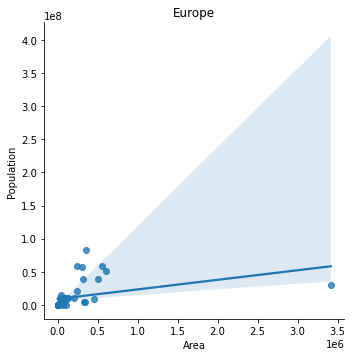

In [3]:
# Q1bis: Relationship area/population for Asian and European countries

sql1 = """SELECT cou.Name AS Country, cou.Area*enc.Percentage/100 AS Area, cou.Population*enc.Percentage/100 AS Population
            FROM country cou
            JOIN encompasses enc
            ON enc.Country = cou.Code
            WHERE enc.Continent = 'Asia'
        """

df1 = pd.read_sql(sql1, conn)
print('Asia:\n')
print(df1.to_string(index=False))

sns.set_palette('flare')
ax1=sns.lmplot(x='Area', y='Population', data=df1)
plt.title('Asia')
plt.show()

ax1.figure.savefig('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Qnou_1.jpg')
df1 = df1.set_index('Country')
df1.head().to_excel('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Qnou_1.xlsx')

sql2 = """SELECT cou.Name AS Country, cou.Area*enc.Percentage/100 AS Area, cou.Population*enc.Percentage/100 AS Population
            FROM country cou
            JOIN encompasses enc
            ON enc.Country = cou.Code
            WHERE enc.Continent = 'Europe'
        """

df2 = pd.read_sql(sql2, conn)
print('\nEurope:\n')
print(df2.to_string(index=False))

sns.set_palette('tab10')
ax2=sns.lmplot(x='Area', y='Population', data=df2)
plt.title('Europe')
plt.show()

ax2.figure.savefig('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Qnou_2.jpg')
df2 = df2.set_index('Country')
df2.head().to_excel('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Qnou_2.xlsx')


Continent      Name  Population  Latitude
   Europe   Aalborg      113865   57.0000
   Europe    Aarhus      194345   56.1000
     Asia Abu Dhabi      363432   24.2700
     Asia     Adana     1047300   36.9833
     Asia      Aden      550744   12.8000


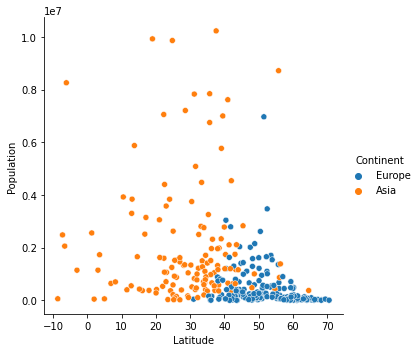

In [4]:
# Q1bisbis: Relationship latitude/population for Asian and European cities
sql = """SELECT DISTINCT enc.Continent, city.Name, city.Population, city.Latitude
                FROM city
                JOIN encompasses enc
                ON city.Country = enc.Country
                WHERE (enc.Continent = 'Asia' OR enc.Continent = 'Europe') 
                    AND city.Population IS NOT NULL 
                    AND city.Latitude IS NOT NULL
                    AND enc.Percentage > 50
          """
df = pd.read_sql(sql, conn)
print(df.head().to_string(index=False))

ax=sns.relplot(x='Latitude', y='Population', hue='Continent', data=df)
plt.show()

ax.figure.savefig('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Qnounou.jpg')
df = df.set_index('Continent')
df.head().to_excel('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Qnounou.xlsx')



Asia:

      Mountain  Height
 Mount Everest    8848
            K2    8611
Kangchendzonga    8586
        Lhotse    8516
        Makalu    8485
       Cho Oyu    8188
    Dhaulagiri    8167
       Manaslu    8163
  Nanga Parbat    8125
     Annapurna    8091

Europe:

        Mountain  Height
      Mont Blanc    4808
      Monte Rosa    4634
      Matterhorn    4478
     GrandCombin    4314
  Finsteraarhorn    4274
Barre des Ecrins    4101
    GranParadiso    4061
     Piz Bernina    4048
   Grossglockner    3797
   Pico de Teide    3718


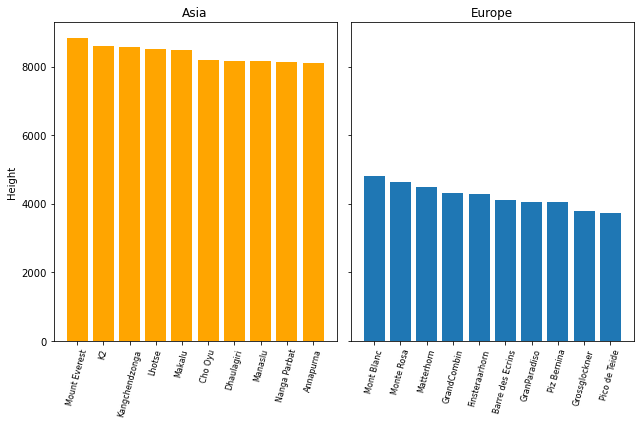

In [5]:
# Q2: Highest mountains in Asia and Europe (JOIN with 3 tables, DISTINCT)

# Asia
sql1 = """SELECT DISTINCT mou.Name as Mountain, CAST(mou.Height AS INT) AS Height
            FROM encompasses enc
            JOIN geo_mountain gem
            ON enc.Country = gem.Country
            JOIN mountain mou
            ON gem.Mountain = mou.Name
            WHERE (enc.Continent = 'Asia') 
            ORDER BY mou.Height DESC
            LIMIT 10
        """
df1 = pd.read_sql(sql1, conn)
print('Asia:\n')
print(df1.to_string(index=False))

df1.to_excel('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q2_1.xlsx')

# Europe
# We must exclude coutries like Russia and Turkey, which have high mountains in their Asian teritories)
sql2 = """SELECT DISTINCT mou.Name as Mountain, CAST(mou.Height AS INT) AS Height
            FROM encompasses enc
            JOIN geo_mountain gem
            ON enc.Country = gem.Country
            JOIN mountain mou
            ON gem.Mountain = mou.Name
            WHERE (enc.Continent = 'Europe') AND (enc.Percentage = 100)
            ORDER BY mou.Height DESC
            LIMIT 10
        """
df2 = pd.read_sql(sql2, conn)
print('\nEurope:\n')
print(df2.to_string(index=False))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9,6))

plt.subplot(1, 2, 1).set_title('Asia')
ax1=plt.bar(df1['Mountain'], df1['Height'], color='orange')
plt.ylabel('Height')
plt.xticks(rotation = 75, fontsize=8)


plt.subplot(1, 2, 2).set_title('Europe')
ax2=plt.bar(df2['Mountain'], df2['Height'])
plt.xticks(rotation = 75, fontsize=8)

plt.tight_layout()
plt.show()

fig.figure.savefig('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q2.jpg')
df1 = df1.set_index('Mountain')
df2 = df2.set_index('Mountain')
df1.to_excel('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q2_1.xlsx')
df2.to_excel('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q2_2.xlsx')


Continent        Country  Number_islands
   Europe United Kingdom              22
   Europe        Germany              15
     Asia      Indonesia              15
   Europe          Spain              11
   Europe         Greece              11
   Europe       Portugal              11
   Europe          Italy              11
     Asia    Philippines              10
   Europe        Denmark               6
     Asia          Japan               5
   Europe    Netherlands               5
     Asia         Russia               4
     Asia           Iran               3
   Europe        Estonia               2
     Asia          India               2


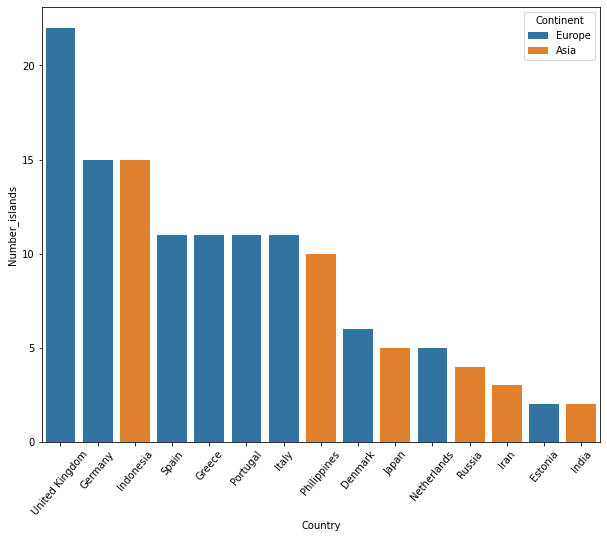

In [6]:
# Q3: Number of islands belonging to Asian and European countries (JOIN with 3 tables, COUNT, DISTINCT, HAVING IN)

sql = """SELECT enc.Continent, cou.Name AS Country, COUNT(DISTINCT gei.Island) AS Number_islands
            FROM country cou
            JOIN encompasses enc
            ON cou.Code = enc.Country
            JOIN geo_island gei
            ON gei.Country = cou.Code
            GROUP BY gei.Country
            HAVING enc.Continent IN ('Europe', 'Asia') 
            ORDER BY Number_islands DESC
            LIMIT 15
        """
df = pd.read_sql(sql, conn)
print(df.to_string(index=False))


# idx=df.index
# clrs = ['blue' if (df.iloc[x]['Continent'] == 'Europe') else 'magenta' for x in idx]
# plt.legend(labels=['Asia', 'Europe'], colors)

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df, x='Country', y='Number_islands', hue = 'Continent', dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

plt.show()

ax.figure.savefig('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q3.jpg')
df = df.set_index('Continent')
df.to_excel('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q3.xlsx')

Asia:

    Country         Island  Latitude
     Russia Kotelny Island     75.40
     Russia         Olkhon     53.15
     Russia    Paramuschir     50.50
     Russia       Sachalin     50.00
      Japan       Hokkaido     43.30
      Japan         Honshu     36.30
      Japan        Shikoku     34.00
South Korea           Jeju     33.40
      Japan         Kyushu     32.00
       Iran          Khark     29.10

Europe:

       Country            Island  Latitude
      Svalbard          Svalbard      78.9
        Norway       Aust-Vagoey      68.3
       Iceland           Iceland      65.0
United Kingdom             Islay      62.1
 Faroe Islands          Streymoy      62.0
United Kingdom Shetland Mainland      60.3
       Finland             Aland      60.1
United Kingdom           Westray      59.4
United Kingdom               Hoy      59.1
United Kingdom   Orkney Mainland      59.0


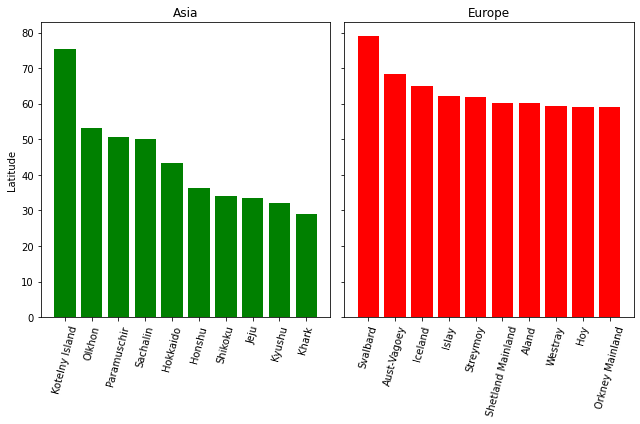

In [7]:
# Q4: Asian and European islands located closest to the North Pole (JOIN with 4 tables, CAST, HAVING IN)

# Asia
sql = """SELECT DISTINCT cou.Name AS Country, isl.Name AS Island, isl.Latitude
            FROM country cou
            JOIN encompasses enc
            ON cou.Code = enc.Country
            JOIN geo_island gei
            ON gei.Country = cou.Code
            JOIN island isl
            ON gei.Island = isl.Name
            WHERE (isl.Latitude) > 0 AND (enc.Percentage > 50) AND (enc.Continent = 'Asia') 
            ORDER BY isl.Latitude DESC
            LIMIT 10
        """
df1 = pd.read_sql(sql, conn)
print('Asia:\n')
print(df1.to_string(index=False))

# Europe
sql = """SELECT DISTINCT cou.Name AS Country, isl.Name AS Island, isl.Latitude
            FROM country cou
            JOIN encompasses enc
            ON cou.Code = enc.Country
            JOIN geo_island gei
            ON gei.Country = cou.Code
            JOIN island isl
            ON gei.Island = isl.Name
            WHERE (isl.Latitude) > 0 AND (enc.Percentage > 50) AND (enc.Continent = 'Europe') 
            ORDER BY isl.Latitude DESC
            LIMIT 10
        """
df2 = pd.read_sql(sql, conn)
print('\nEurope:\n')
print(df2.to_string(index=False))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9,6))

plt.subplot(1, 2, 1).set_title('Asia')
ax1=plt.bar(df1['Island'], df1['Latitude'], color='green')
plt.ylabel('Latitude')
plt.xticks(rotation = 75)

plt.subplot(1, 2, 2).set_title('Europe')
ax2=plt.bar(df2['Island'], df2['Latitude'], color='red')
plt.xticks(rotation = 75)

plt.tight_layout()
plt.show()

fig.figure.savefig('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q4.jpg')
df1 = df1.set_index('Country')
df2 = df2.set_index('Country')
df1.to_excel('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q4_1.xlsx')
df2.to_excel('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q4_2.xlsx')

Continent     River_name  Number_afluents
   Europe          Donau               16
   Europe          Rhein                4
   Europe          Weser                3
     Asia             Ob                3
     Asia Schatt al Arab                3
   Europe             Po                3
   Europe           Aare                2
     Asia           Amur                2
   Europe          Rhone                2
   Europe           Drin                2


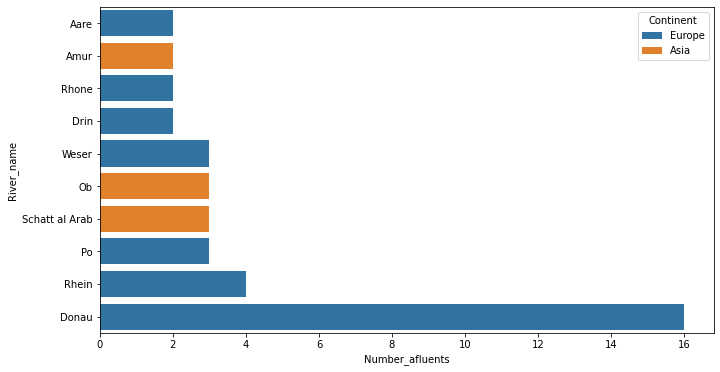

In [8]:
# Q5: Rivers with the most affluents in Asia and Europe (JOIN with 3 tables, recursive query, HAVING IN)

sql = """SELECT enc.Continent, r1.Name AS River_name, COUNT(r2.River) AS Number_afluents 
            FROM river r1
            JOIN river r2
            ON r1.Name = r2.River
            JOIN geo_source gesu
            ON r1.Name = gesu.River
            JOIN encompasses enc
            ON gesu.Country = enc.Country
            WHERE enc.Percentage > 50
            GROUP BY enc.Continent, r1.Name
            HAVING enc.Continent IN ('Europe', 'Asia')
            ORDER BY Number_afluents DESC
            LIMIT 10
        """

df = pd.read_sql(sql, conn)
print(df.to_string(index=False))

# df = df.set_index('River_name')
# df.plot(y = ['Number_afluents'], kind='barh')
# colors = tuple(np.where('Continent' == 'Asia', 'm', 'b'))

plt.figure(figsize=(11, 6))
ax = sns.barplot(data=df, 
                 x='Number_afluents', 
                 y='River_name', 
                 hue = 'Continent', 
                 orient='h', 
                 dodge=False, 
                 order=df.sort_values('Number_afluents', ascending=True).River_name
                )
# ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

plt.show()

ax.figure.savefig('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q5.jpg')
df = df.set_index('Continent')
df.to_excel('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q5.xlsx')


Continent         River  Number_countries
   Europe         Donau                10
   Europe         Rhein                 6
     Asia        Jordan                 5
     Asia        Mekong                 5
   Europe          Drau                 5
   Europe          Save                 4
     Asia      Amudarja                 4
   Europe           Mur                 4
   Europe           Inn                 3
     Asia        Ganges                 3
   Europe         Pruth                 3
     Asia      Syrdarja                 3
   Europe Western Dwina                 3
   Europe         March                 3
     Asia         Naryn                 3


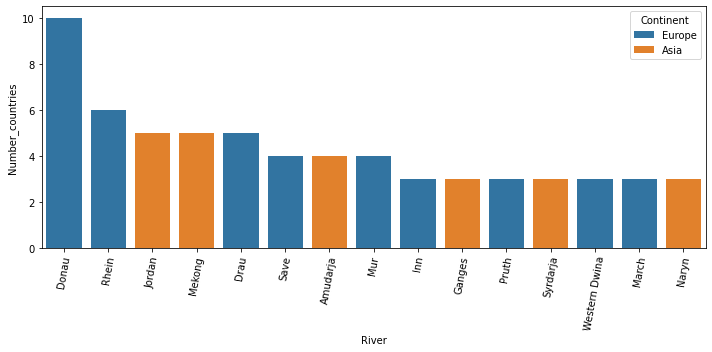

In [9]:
# Q7: Rivers passing through the most countries in Asia and Europe (nested query, UNION, COUNT, HAVING IN)

sql = """SELECT enc.Continent, countries.River, COUNT(*) AS Number_countries 
            FROM
            (
            SELECT River, Country FROM geo_source gesu 
            UNION 
            SELECT River, Country FROM geo_river ger 
            UNION 
            SELECT River, Country FROM geo_estuary gee 
            ) countries
        JOIN encompasses enc
        ON countries.Country = enc.Country
        GROUP BY enc.Continent, countries.River
        HAVING enc.Continent IN ('Europe', 'Asia')
        ORDER BY Number_countries DESC
        LIMIT 15
    """

df = pd.read_sql(sql, conn)
print(df.to_string(index=False))

# idx=df.index
# clrs = ['blue' if (df.iloc[x]['Continent'] == 'Europe') else 'yellow' for x in idx]

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, x='River', y='Number_countries', hue = 'Continent', dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.tight_layout()
plt.show()

ax.figure.savefig('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q7.jpg')
df = df.set_index('Continent')
df.to_excel('C:/Users/danie/Desktop/DH 2022-2023/STRUCTURES = SQL/PROJECT/Q7.xlsx')

In [10]:
# Question 8
# What are the Asian and European countries that have Mediterranean ports? (nested query, HAVING IN)

sql = """SELECT enc.Continent, cou.Name
            FROM country cou 
            JOIN encompasses enc
            ON cou.Code = enc.Country
            WHERE cou.Code IN
                (
                SELECT loc.Country
                FROM located loc
                WHERE loc.Sea = 'Mediterranean Sea'
                )
            HAVING enc.Continent IN ('Europe', 'Asia')
        """

df = pd.read_sql(sql, conn)
print(df.to_string(index=False))



Continent       Name
   Europe    Albania
     Asia      Egypt
   Europe     France
     Asia Gaza Strip
   Europe     Greece
     Asia     Israel
   Europe      Italy
     Asia    Lebanon
   Europe      Malta
   Europe     Monaco
   Europe      Spain


In [11]:
# Question 9
# What is the river passing through the most countries in the world? Is it in Europe or Asia? (nested queries, UNION, MAX, HAVING IN)

sql = """SELECT enc.Continent, countries.River, COUNT(*) AS Number_countries 
        FROM 
            (
            SELECT River, Country FROM geo_source gesu 
            UNION 
            SELECT River, Country FROM geo_river ger 
            UNION 
            SELECT River, Country FROM geo_estuary gee 
            ) countries
        JOIN encompasses enc
        ON countries.Country = enc.Country
        GROUP BY countries.River
        HAVING COUNT(*) = 
            (
            SELECT MAX(counts.Number_countries )
            FROM
               (
               SELECT River, COUNT(*) AS Number_countries 
               FROM
                   (
                    SELECT River, Country FROM geo_source gesu 
                    UNION 
                    SELECT River, Country FROM geo_river ger 
                    UNION 
                    SELECT River, Country FROM geo_estuary gee 
                    ) countries
               GROUP BY River
               ) counts
            )
        """
df = pd.read_sql(sql, conn)
print(df.to_string(index=False))


Continent River  Number_countries
   Europe Donau                10


In [12]:
# Question 10
# What is the country with most cities in the world? Is it in Europe or Asia? (nested queries, COUNT, HAVING) 

sql = """SELECT enc.Continent, cou.Name, COUNT(*) AS Number_cities 
        FROM city
        JOIN country cou
        ON city.Country = cou.Code
        JOIN encompasses enc
        ON cou.Code = enc.Country
        GROUP BY cou.Code
        HAVING COUNT(*) = 
        (
            SELECT MAX(table_cities.Number_cities)
            FROM
           (
            SELECT cou.Code, COUNT(*) AS Number_cities 
            FROM city
            JOIN country cou
            ON city.Country = cou.Code
            GROUP BY cou.Code
            ) table_cities
          )
        """

df = pd.read_sql(sql, conn)
print(df.to_string(index=False))
     

Continent  Name  Number_cities
     Asia China            308
